# Q-Learning Algorithms and their Application to Optimal Trading Problems:
## The Q-learning implementation

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed

In [10]:
%precision 4
%config InlineBackend.figure_format = "retina"

## The Ornstein-Uhlenbeck process

In [192]:
# Going from (kappa, theta, sigma) -> (alpha, beta, gamma)
# does not seem to work properly (variance is way too low)
dt = 1 / 60
kappa, theta, sigma = 1, 1, 0.02

alpha = theta * (1 - np.exp(-kappa * dt))
beta = np.exp(-kappa * dt)
gamma = np.sqrt(sigma ** 2 * (1 - np.exp(-2 * kappa * dt)) / (2 * kappa))

In [193]:
alpha, beta, gamma

(0.01652854617838251, 0.9834714538216175, 0.0025606209996012334)

In [279]:
timesteps = 500
t = np.linspace(0, 2, timesteps)

alpha, beta = .08, 0.98
gamma = .2
e_t = randn(timesteps) * gamma

In [275]:
seed(314)
x0 = 1.5
X = np.zeros(timesteps)
for t in range(timesteps):
    if t == 0:
        X[t] = x0
    else:
        X[t] = alpha + beta * X[t-1] + e_t[t-1]
X = X

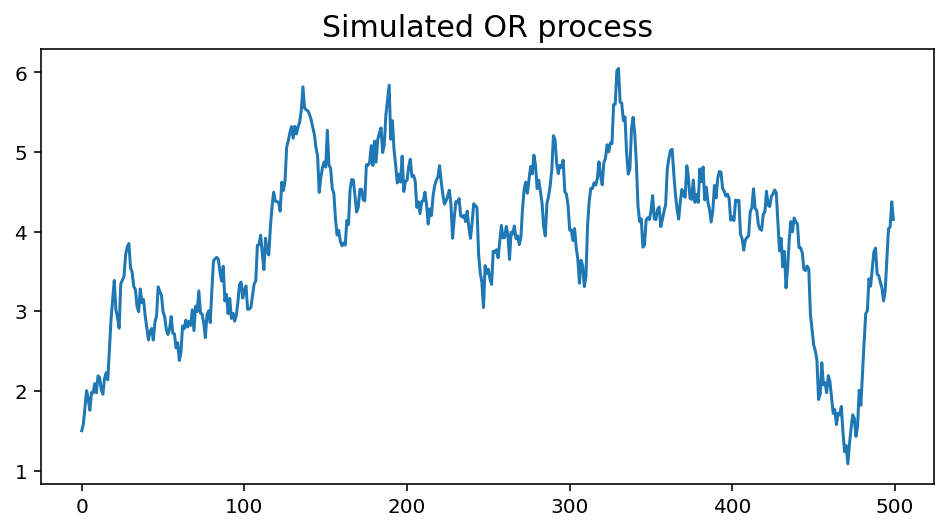

In [276]:
plt.figure(figsize=(8, 4))
plt.title("Simulated OR process", fontsize=15)
plt.plot(X);

We consider a three-tuple state that takes us to a single action

```
* T: terminal time (0, T)
* N: intermediate trading periods
* A: Number of shares traded at a single period
* Q: Current inventory
```

In [277]:
T, N, A, Q = 1, 1, 1, 1
Q = np.zeros((T, N, A, Q))

In [280]:
sigma = np.sqrt(2 * gamma ** 2 * np.log(beta) / (beta ** 2 - 1))
sigma

0.20202363756848574

In [281]:
n = 3.5
xmin, xmax = theta + np.array([-1, 1]) *  n * sigma / np.sqrt(2 * kappa)
xmin, xmax

(0.5000170057037263, 1.4999829942962737)

In [291]:
# When we simulate our price path, we bin our observations
# into into intervals degined by the grid-points
M = 100
delta_x = (xmax - xmin) / M
bins = np.arange(M) * delta_x + xmin

## Implementation

* To-do: Correct OU process

In [252]:
def simulate_or_process(x0, alpha, beta, gamma, timesteps):
    e_t = randn(timesteps) * gamma
    X = np.zeros(timesteps)
    for t in range(timesteps):
        if t == 0:
            X[t] = x0
        else:
            X[t] = alpha + beta * X[t-1] + e_t[t-1]
    return X

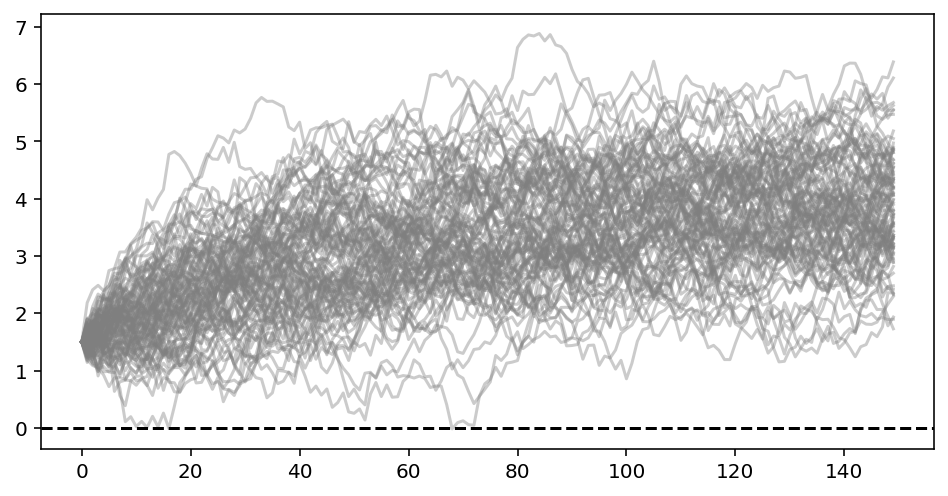

In [285]:
n_simulations = 100
timesteps = 150
x0 = 1.5

plt.figure(figsize=(8, 4))
for n in range(n_simulations):
    seed(314 + n)
    sim = simulate_or_process(x0, alpha, beta, gamma, timesteps)
    plt.plot(sim, c="tab:gray", alpha=0.4)
plt.axhline(y=0, c="black", linestyle="--")

In [256]:
tsteps = np.arange(timesteps) / 60
Et = x0 * np.exp(-kappa * tsteps) + theta * (1 - np.exp(-kappa * tsteps))

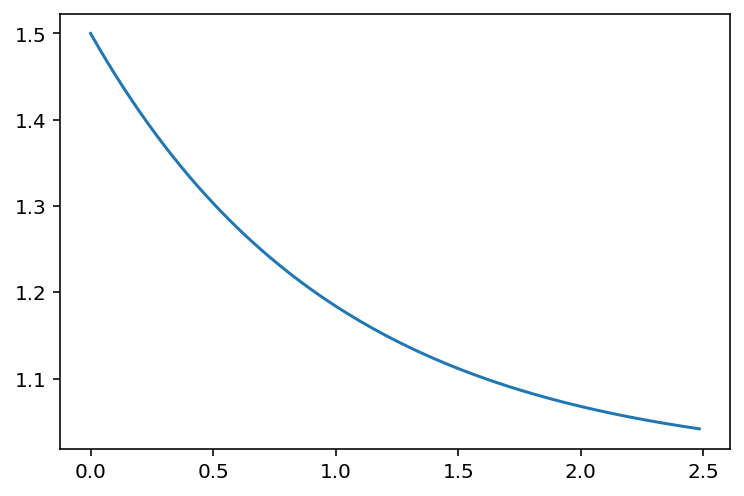

In [257]:
plt.plot(tsteps, Et)